# Facial Keypoint Detection
## Exploratory Data Analysis

In this notebook, we have documented data exploration on the CSV data file supplied by the original author of the data research. Data visualizations are paired with some explanation and topics to think about.

The original dataset can be found [here.](https://www.kaggle.com/datasets/nagasai524/facial-keypoint-detection/)

### Dataset Attribute Information
1. **left_eye_center_x, left_eye_center_y, left_eye_inner_corner_x,left_eye_inner_corner_y, left_eye_outer_corner_x, left_eye_outer_corner_y**: Coordinate depicting parts of the left eye
2. **right_eye_center_x, right_eye_center_y, right_eye_inner_corner_x right_eye_inner_corner_y, right_eye_outer_corner_x, right_eye_outer_corner_y**: Coordinates depicting parts of the right eye
3. **left_eyebrow_inner_end_x, left_eyebrow_inner_end_y, left_eyebrow_outer_end_x, left_eyebrow_outer_end_y**: Coodinates depicting parts of the left eyebrow
4. **right_eyebrow_inner_end_x, right_eyebrow_inner_end_y, right_eyebrow_outer_end_x, right_eyebrow_outer_end_y**: Coordinates depicting parts of the right eyebrow
5. **nose_tip_x, nose_tip_y**: Coordinates depicting parts of the nose
6. **mouth_left_corner_x, mouth_left_corner_y, mouth_right_corner_x, mouth_right_corner_y**: Coordinates depicting parts of the mouth
7. **mouth_center_top_lip_x, mouth_center_top_lip_y, mouth_center_bottom_lip_x, mouth_center_bottom_lip_y**: Coordinates depicting parts of the lip

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from IPython.display import display

dataset = pd.read_csv('training.csv')
# print(dataset)

# Visuals
## Histograms
Below is depicted the histograms for each attribute, similarly shown in the original Kaggle site. With the visual, we can see the distribution of data throughout each characteristics. From there we can point out the central tendency, skewness, and data range. By knowing the symmetry and skewness of data, we can see if there is an imbalance or bias in facial features. We can also get a quick overview of which points may cause model imperfections when we build our model.

1. Where are the highest peaks/greatest clusters?
The highest peaks are with the center xy coordinates for the right eye and y coordinate for the left eye with over 5000 of the entries landing in the same range. 
2. Are there any outliers that might represent unusual data?
With some squinting, it is detected that features like the y coordinate of the right eye inner corner and left eye inner corner, have some extreme outliers. Unlike most other features' outliers, these two characteristics' outlier tail skew far to the right which could represent very unusual data.
3. Which features are the most consistent? Least consistent?
The center xy coordinates for the right eye and y coordinate for the left eye are extremely consistent. Surprisingly, the center x coordinate for the left eye looks very different than those other three coordinates. Parts of the mouth, namely the y coordinate of the mouth's right corner, left corner and the y coordinate of the center of the lip, are the least consistent. These graphs are very distributed throughout which could be due to the varying heights/thickness of mouths/lips.
4. What do these histograms tell us about facial structure?
For a majority population, the x coordinates of most facial features are very standard and do not waver too far off the average. When it comes to the y coordinate or the height of those keypoints, there can be many different variations possibly due to how long/short a face can be and other factors that play into how big our eyes are or how thin our lips can be, and so on.

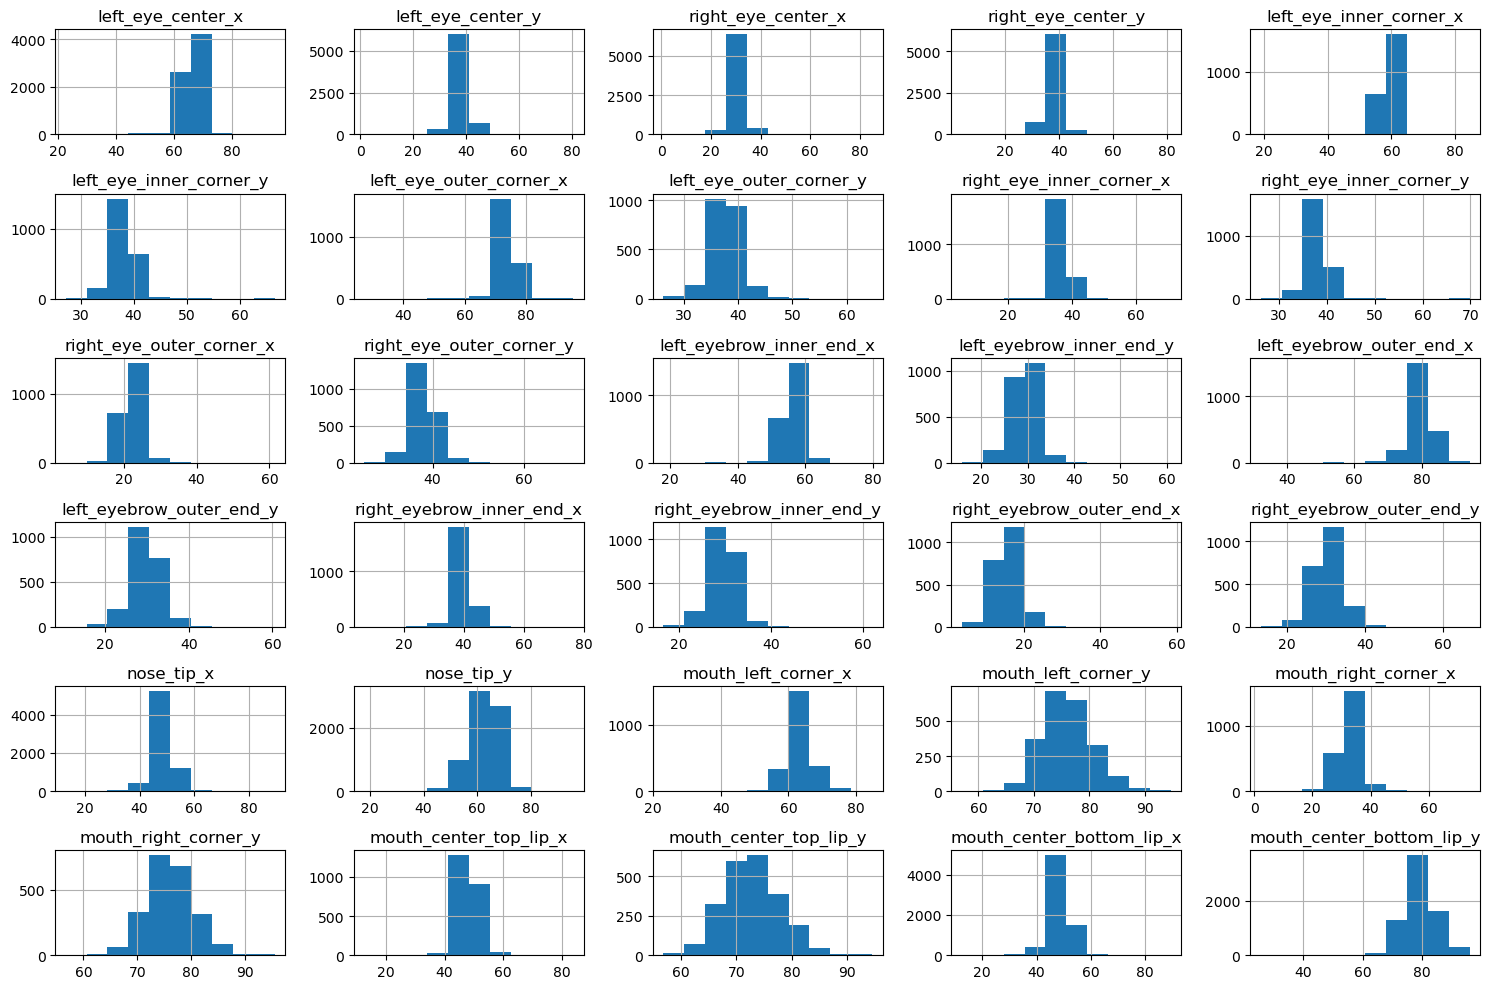

In [7]:
dataset.hist(figsize=(15,10)) # ADJUST
plt.tight_layout()
plt.show()

## Box Plots
To get a better detailed look at our outliers, it is a good idea to try out box plots. This can give us a better visual of every part in our data from the mean to quartiles, median to outliers. With a better idea of our outliers, we can handle the skewed data and identify important factors for building a model. The readability and presentation of box plots are good for interpretation especially when dealing with such big dataset of over 6,000 data points.

1. Looking at the outliers more clearly, what might they represent? Facial variations or data anomalies?
2. What are the patterns shown throughout different outliers? Are these problematic values?
3. How wide are the quartiles for each keypoint? Are there significant differences in the spread of values?
4. A lot of faces have some symmetry. Is there symmetry depicted in these datapoints compared to each other?
It is hard to see the relationships between points with just box plots but it can be briefly suggested that some points do show symmetry like the center of the left eye and right eye are around the same height level. Other symmetry can be shown in the height of the eyebrows, corner of the mouth, and center of the lips.

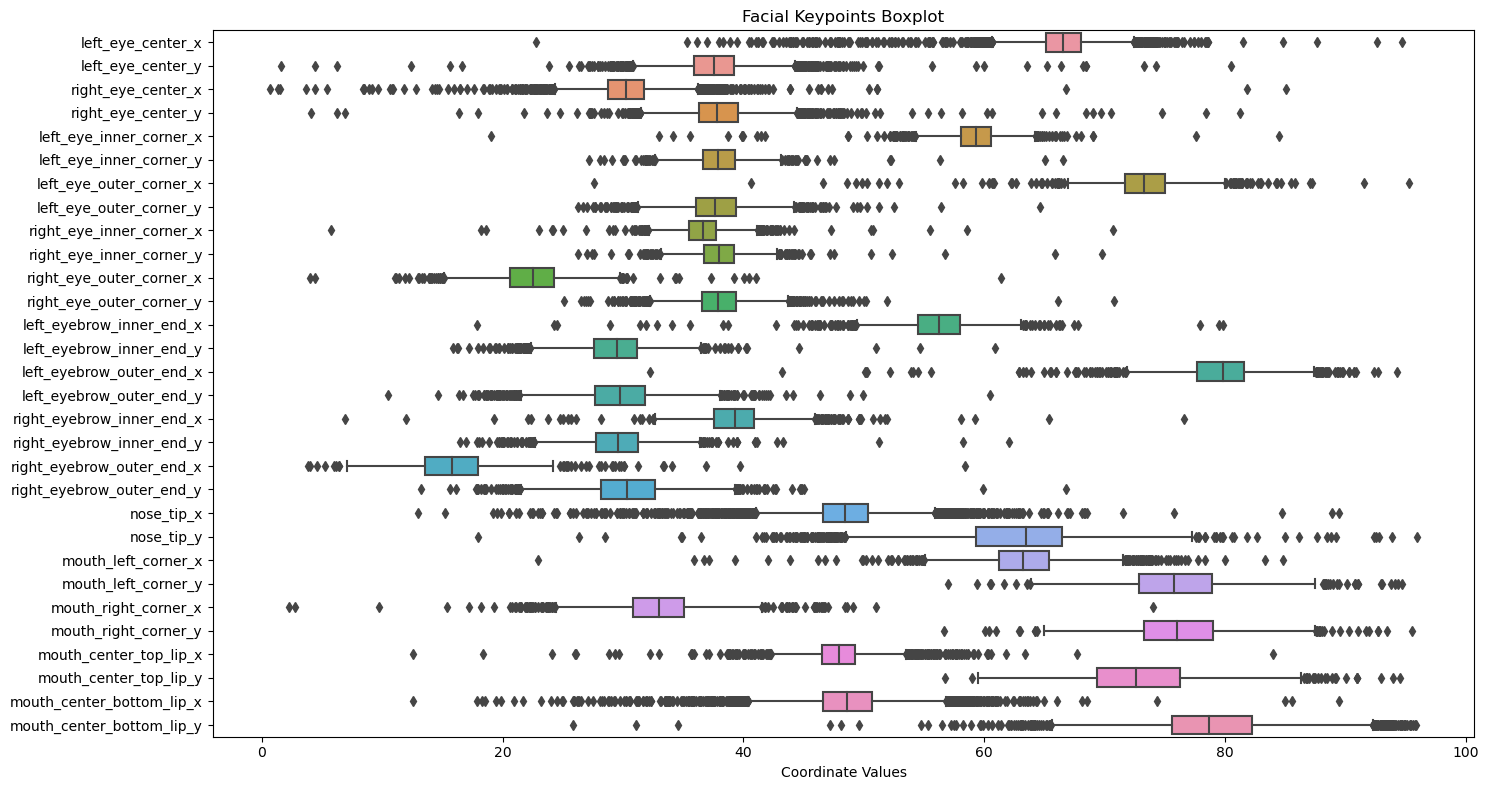

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, orient='h')
plt.xlabel('Coordinate Values')
plt.title('Facial Keypoints')
plt.tight_layout()
plt.show()

## Pair Plots
Pairplots are used for visualizing relationships between many variables simultaneously. This makes it easier for us to see if there is any possible relationship between certain features. This dataset is quite big and is of many features, making it hard to see if there are any relationships established between variables so a pairplot can make it easier to see. It gives us  quick overview of the relationships between all pairs of variables in the dataset.

1. Are there any visible patterns or trends?
2. Which pairs of keypoints show correlations?
3. Are there groups of keypoints that show relationship/pattern?
4. Do certain pairs of keypoints show redundancy? What does that mean?
5. What do the relationships of these pairs reveal about facial structure/the data?


c:\Users\noble\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


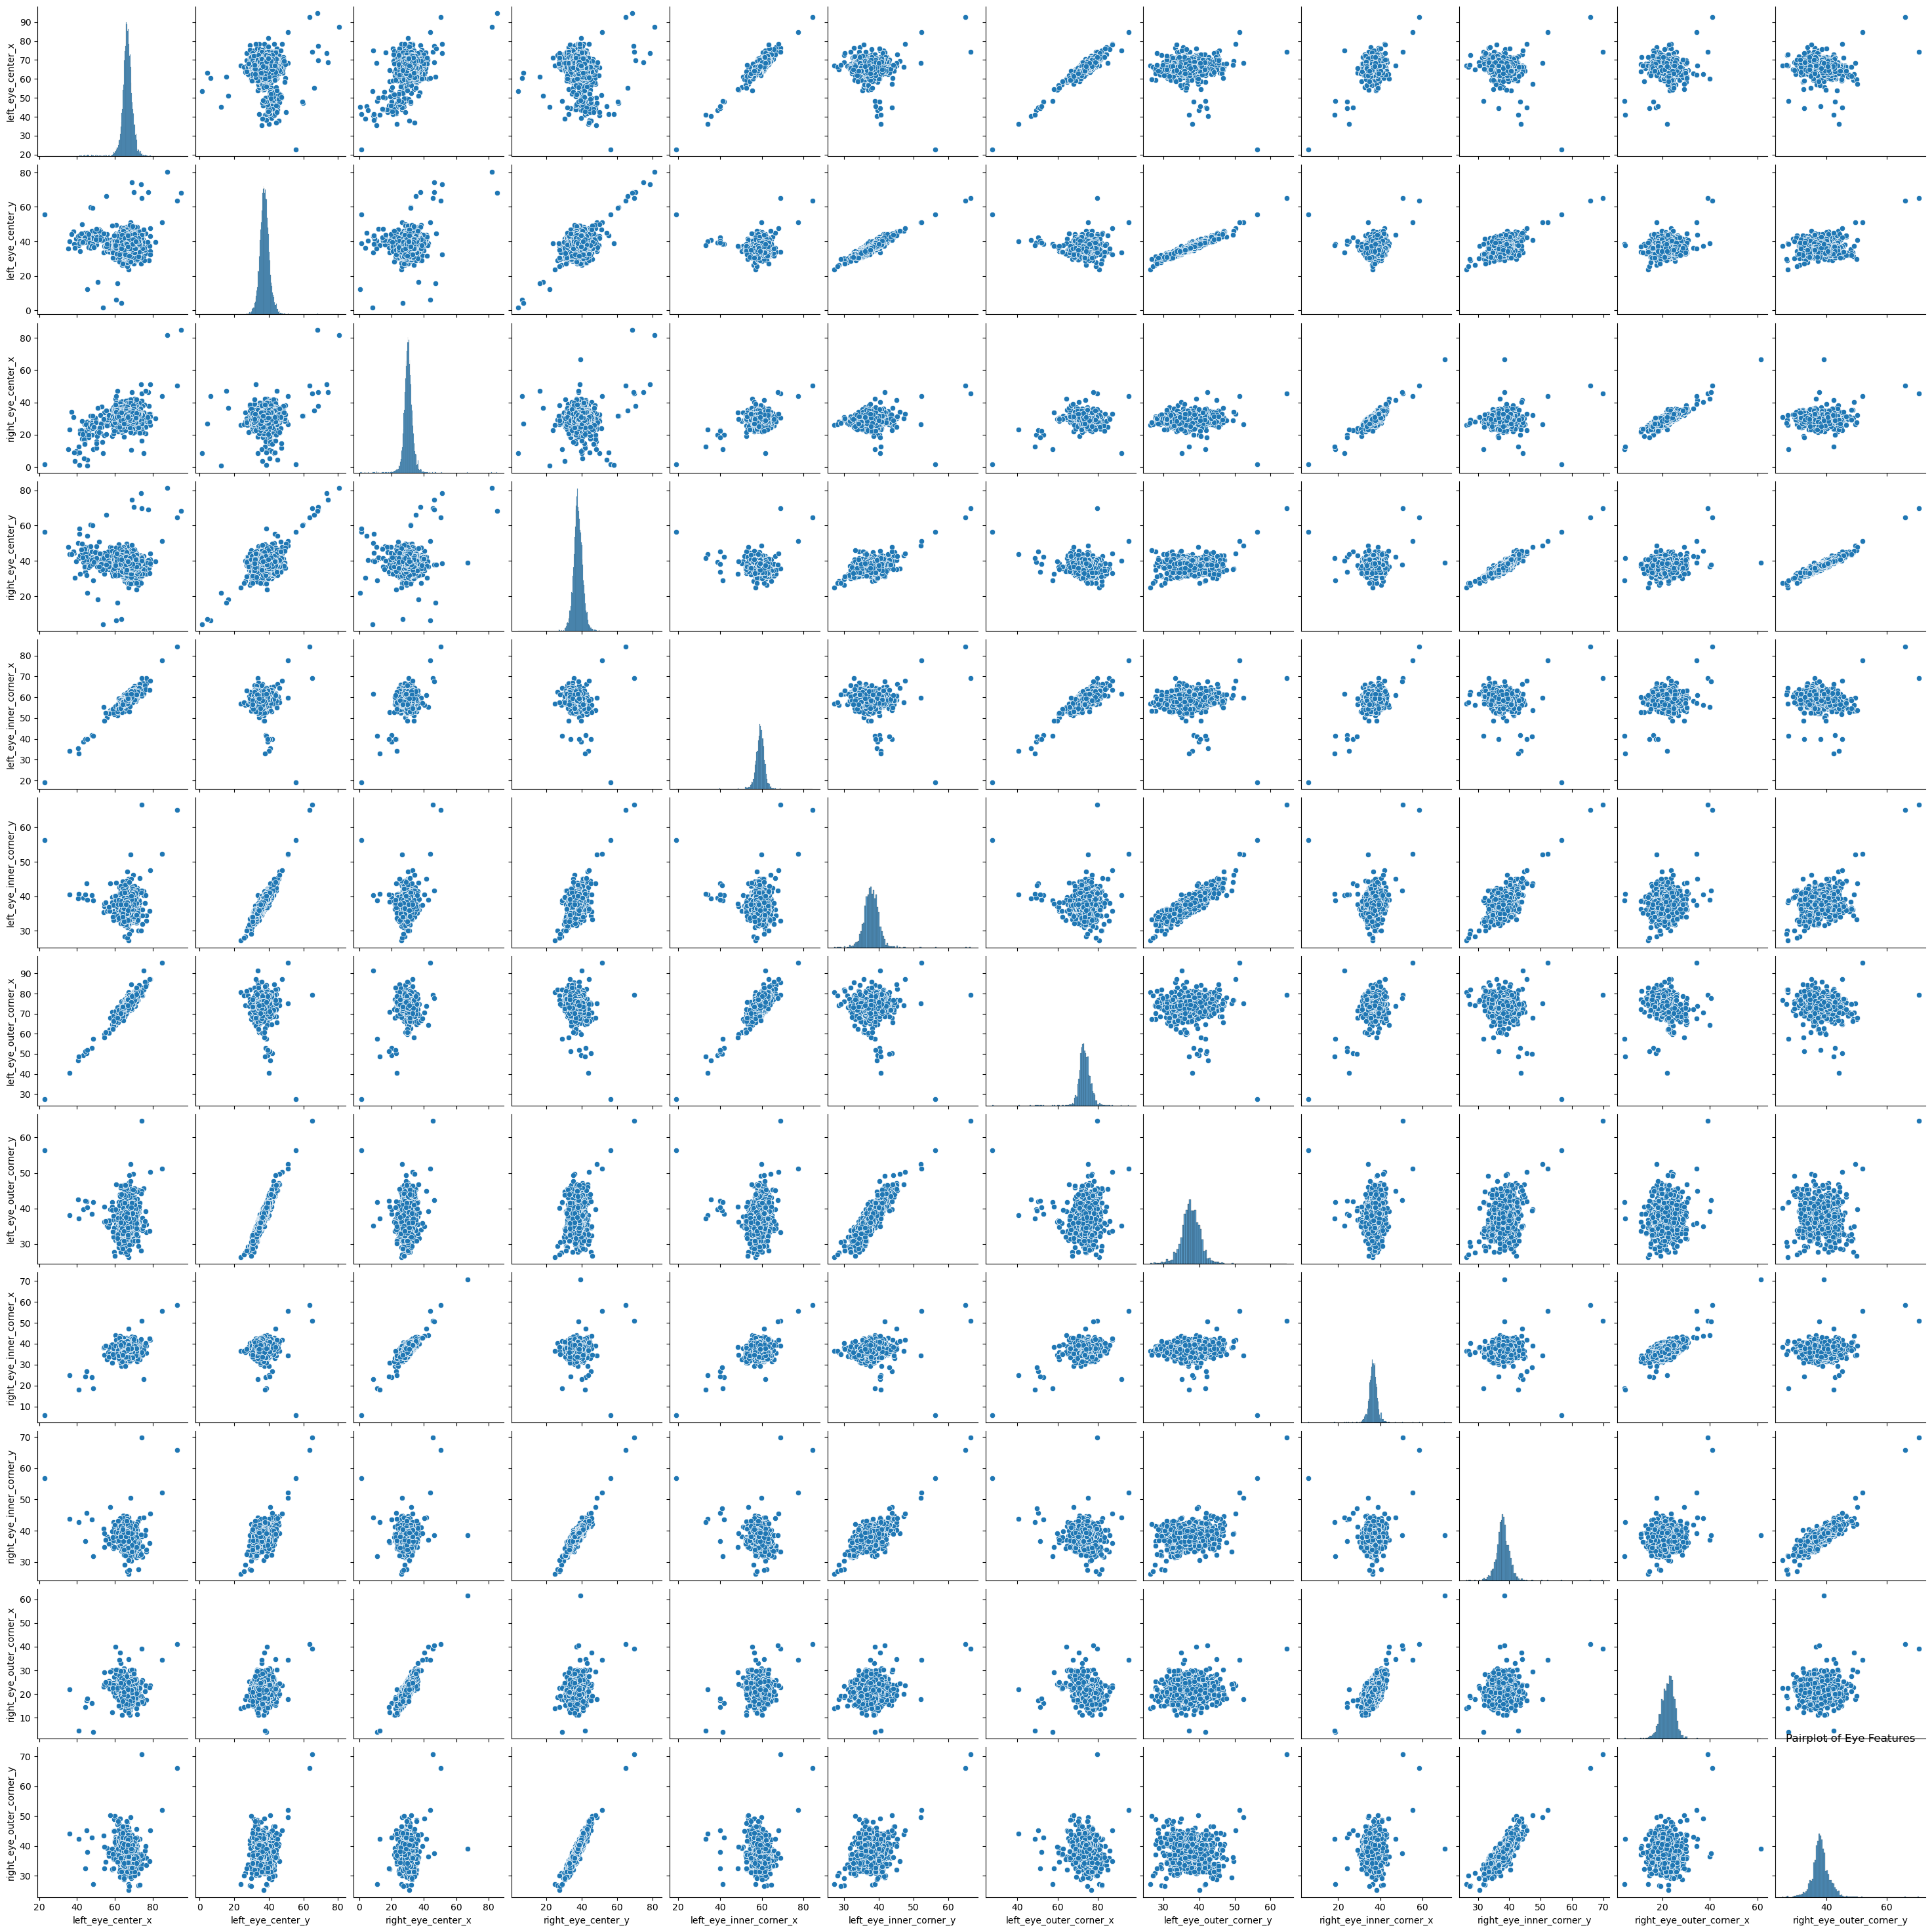

c:\Users\noble\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


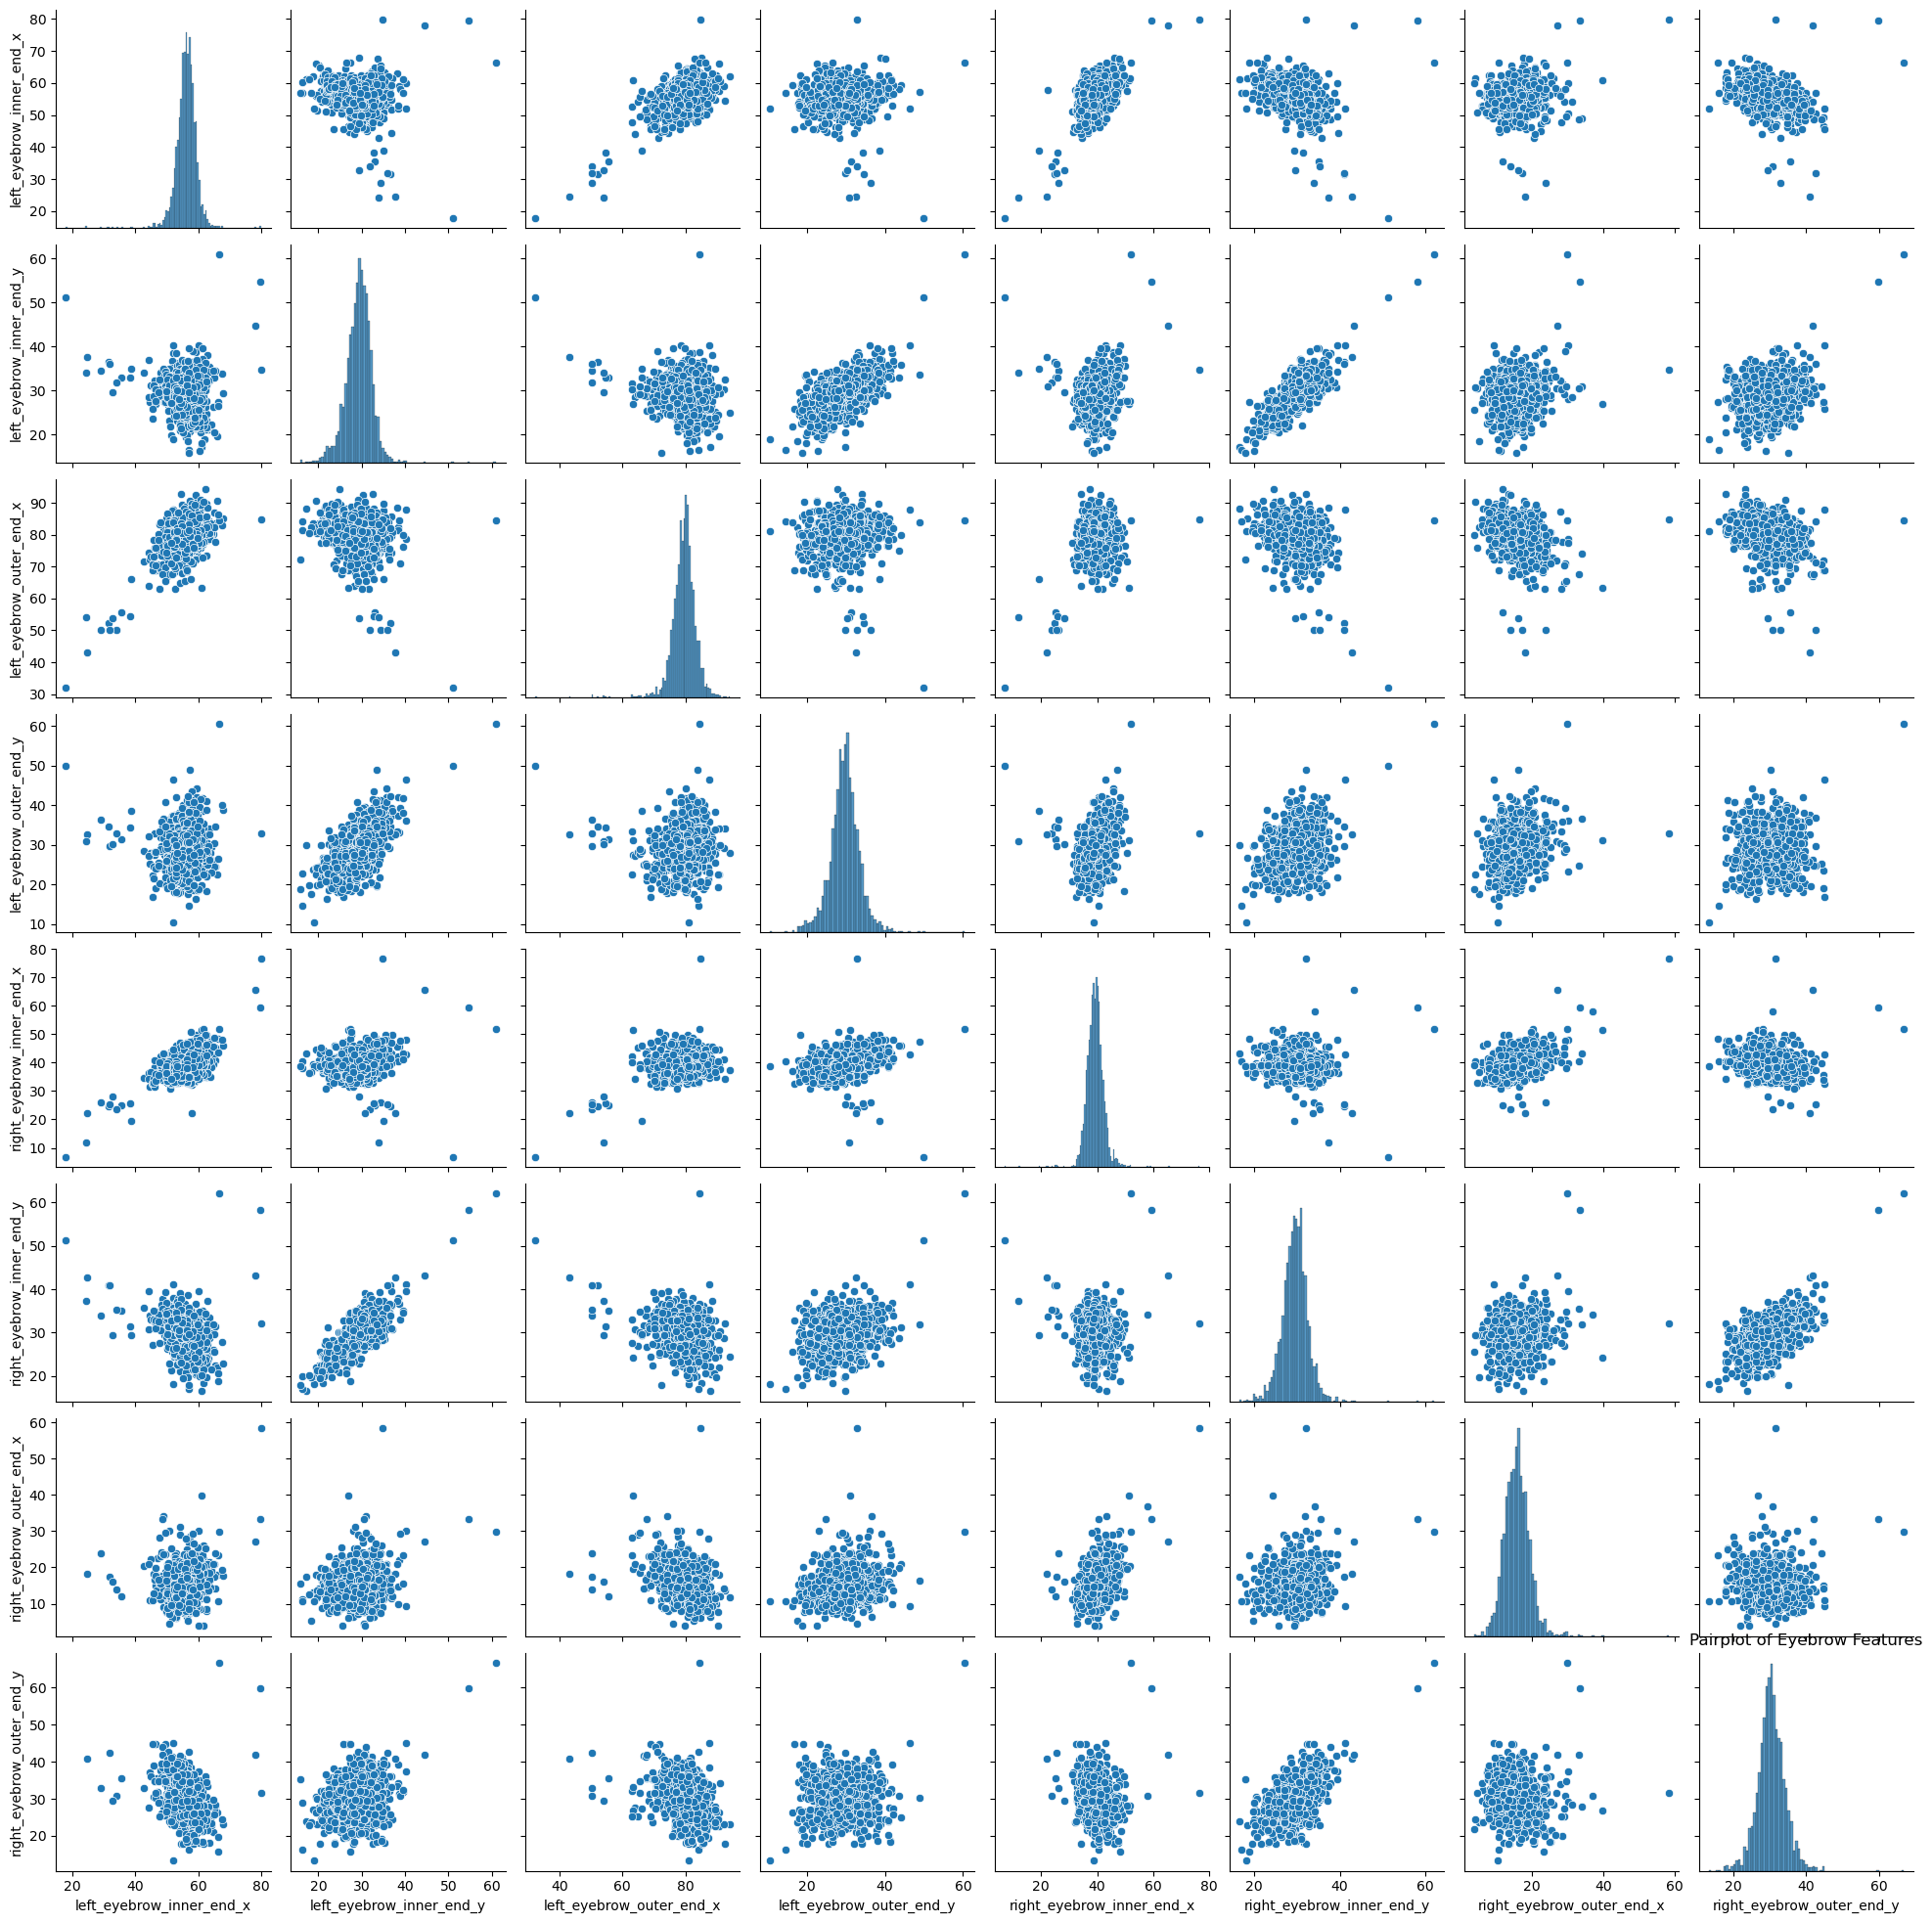

c:\Users\noble\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


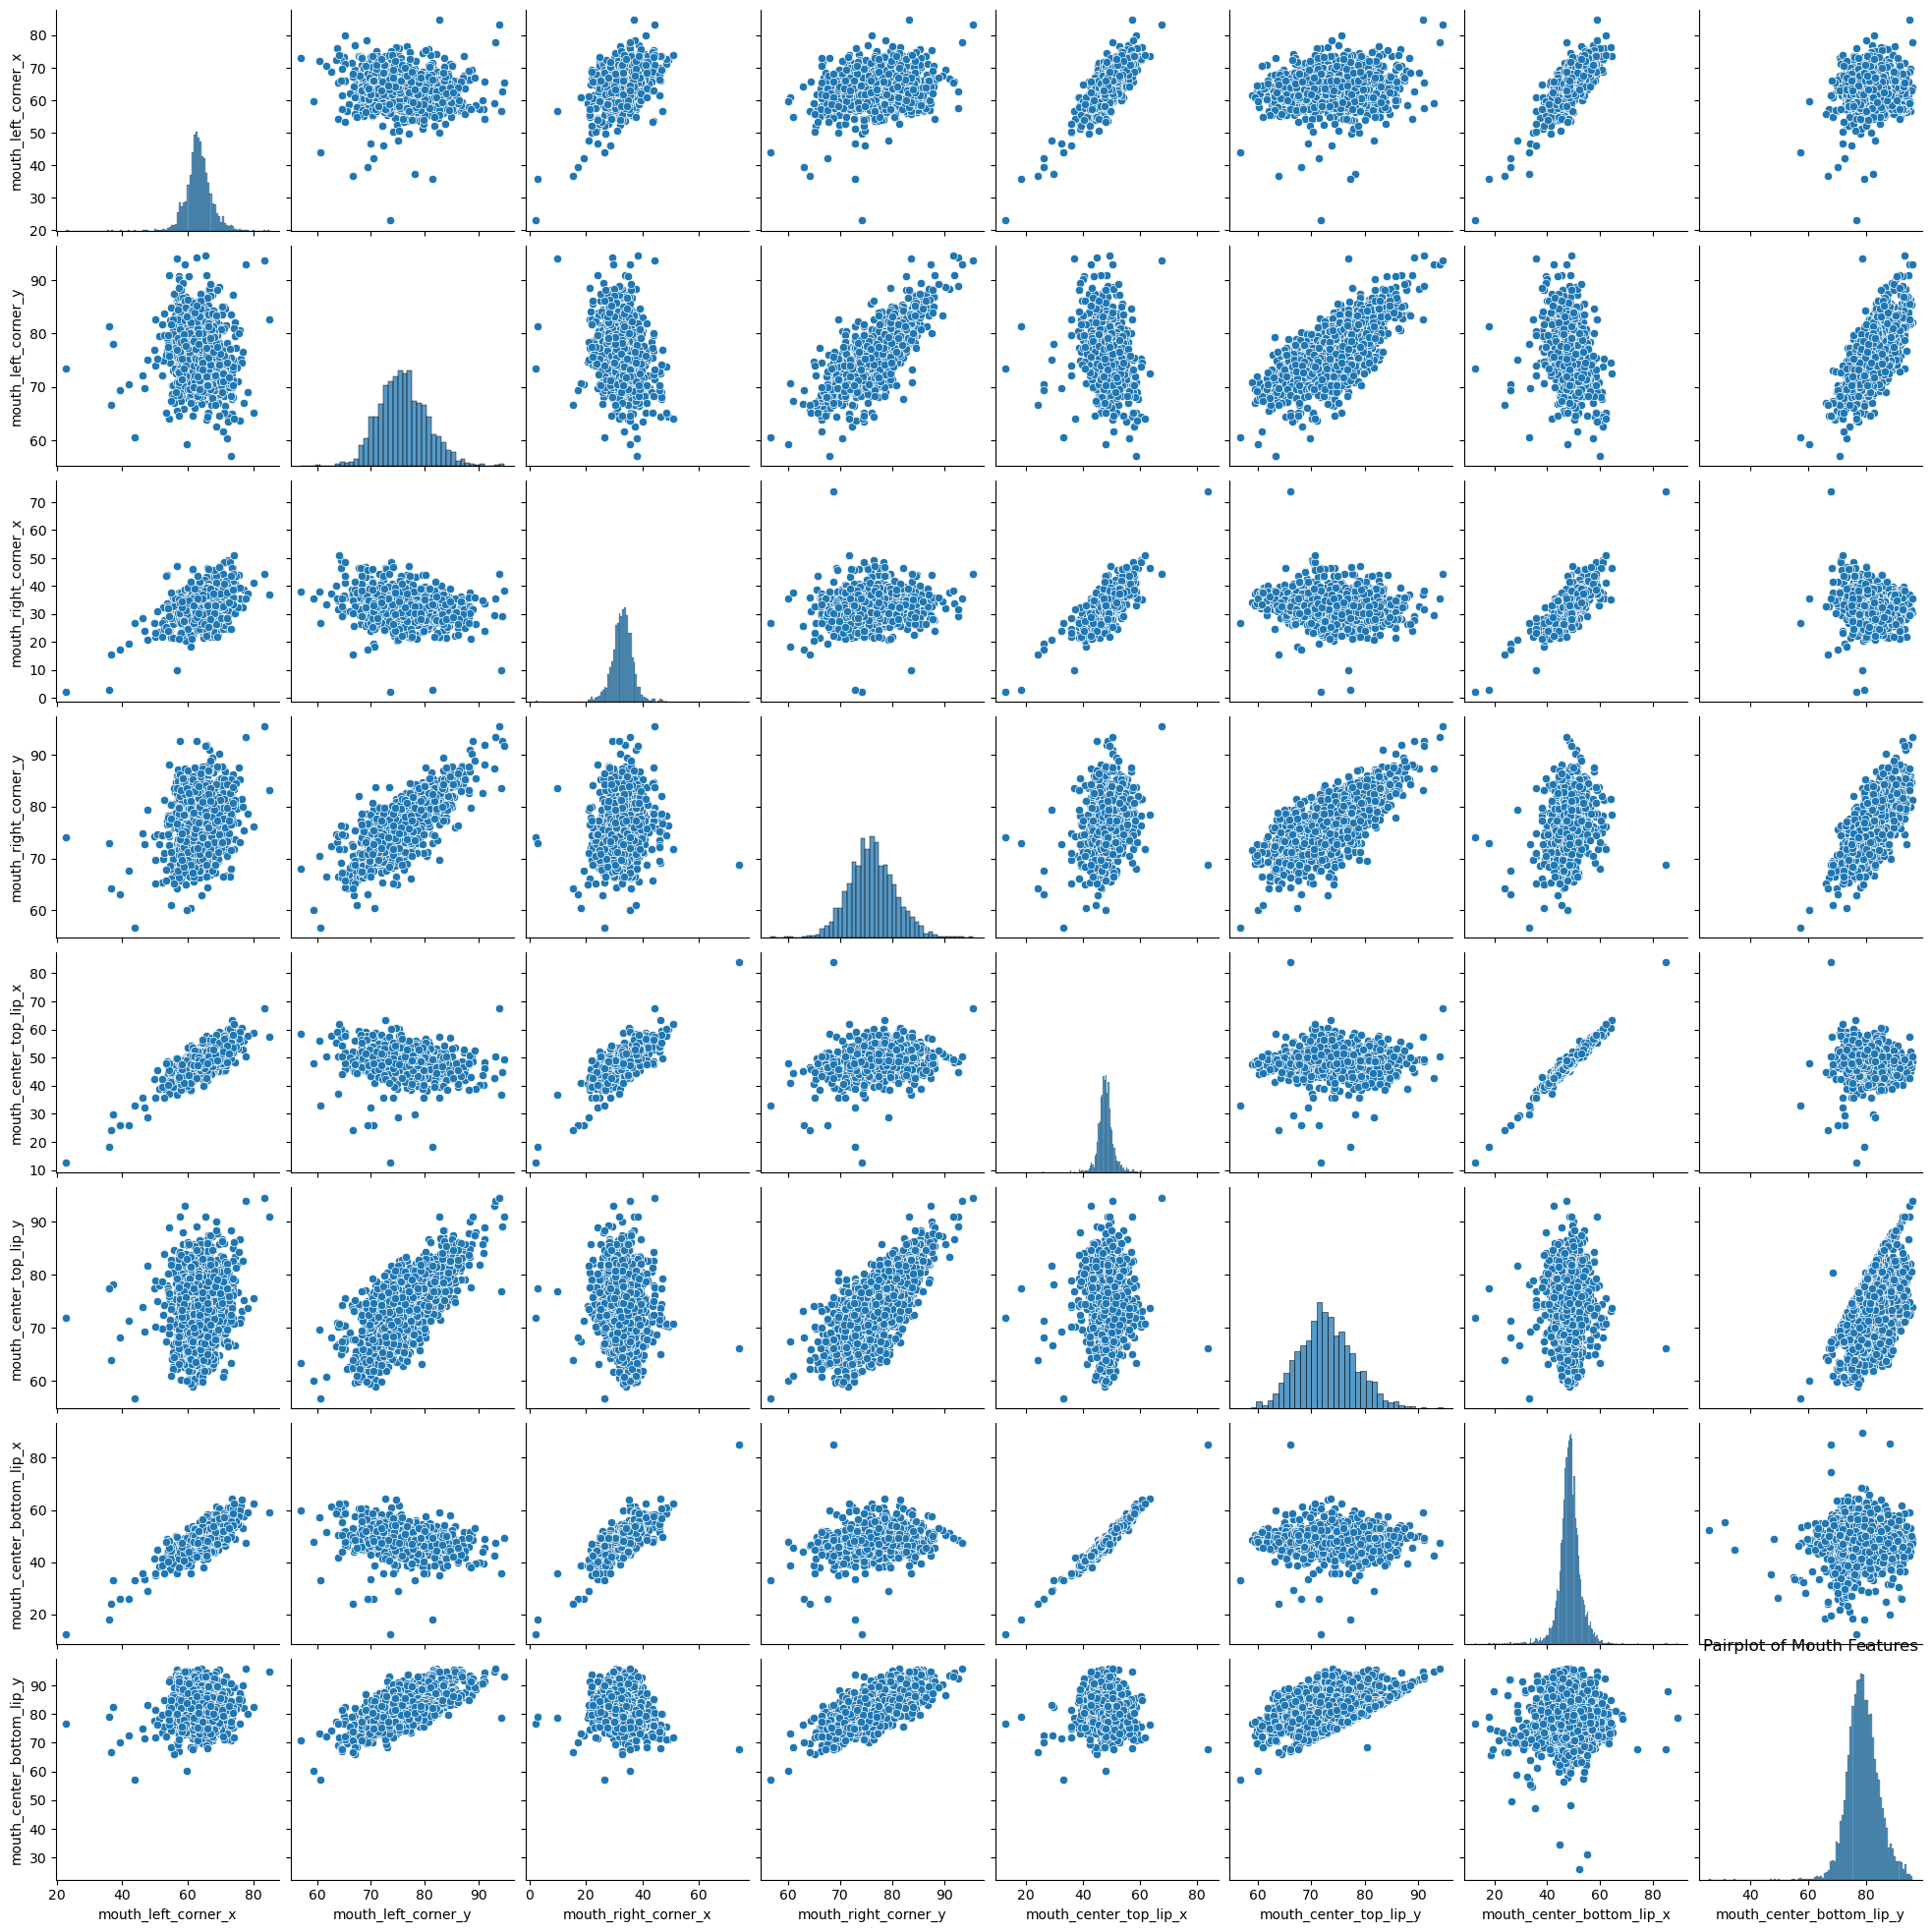

In [44]:
eye_features = [
    'left_eye_center_x', 'left_eye_center_y',
    'right_eye_center_x', 'right_eye_center_y',
    'left_eye_inner_corner_x', 'left_eye_inner_corner_y',
    'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
    'right_eye_inner_corner_x', 'right_eye_inner_corner_y',
    'right_eye_outer_corner_x', 'right_eye_outer_corner_y'
]

eyebrow_features = [
    'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y',
    'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
    'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y',
    'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y'
]

mouth_features = [
    'mouth_left_corner_x', 'mouth_left_corner_y',
    'mouth_right_corner_x', 'mouth_right_corner_y',
    'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'
]

eye = dataset[eye_features]
sns.pairplot(eye)
plt.title('Pairplot of Eye Features')
plt.show()

eyebrow = dataset[eyebrow_features]
sns.pairplot(eyebrow)
plt.title('Pairplot of Eyebrow Features')
plt.show()

mouth = dataset[mouth_features]
sns.pairplot(mouth)
plt.title('Pairplot of Mouth Features')
plt.show()


## Heatmap
Heatmaps are great to display the correlation matrix between features. It is a concise way to represent the strength of the relationships we managed to find in the pairplots. This furthers are analysis on the data from just looking at the outliers and distributions, to recognizing the strength of the correlations we may be working with in our models. With all these combined, we can havea better idea of what to look at when creating our model. We have 1 as the color red for heat, and the bluer it is, the further away from 1 it is.

1. Which pairs exhibit the strongest positive correlations? What is the significance?
Most of the stronger positive correlations are y values like the corner of the eyes and inner height of the eyebrows. The significance really is just seeing that average features of our face are usually symmetric of the eye, nothing too surprising. The correlation for parts of the mouth was a little lower but, to some extent, still had some positive correlation. This could be due to the varying different shapes of mouths in the dataset, as mentioned about the outliers of those features previously.
2. Are there any pairs showing strong negative correlation? What do those mean?
There were no pairs under -0.5 of negative correlation. I believe the most negative correlations stem from comparing different ends of keypoints like the outer x coordinate of our eyebrows or the outer corner x coordinate of our left and right eyes.
3. What section (eye, eyebrow, mouth) of the face provide the most consistent correlations?
The eye provided the most consistent correlations, though a few negative ones. It had the most relationship, hence, symmetry. It is just our evolution to have our eyes being symmetrical the most possibly due to things like how our eyes work to provide vision, genetic influences, and other things.
4. Are there specific features that could harm the model due to unexpected nature?

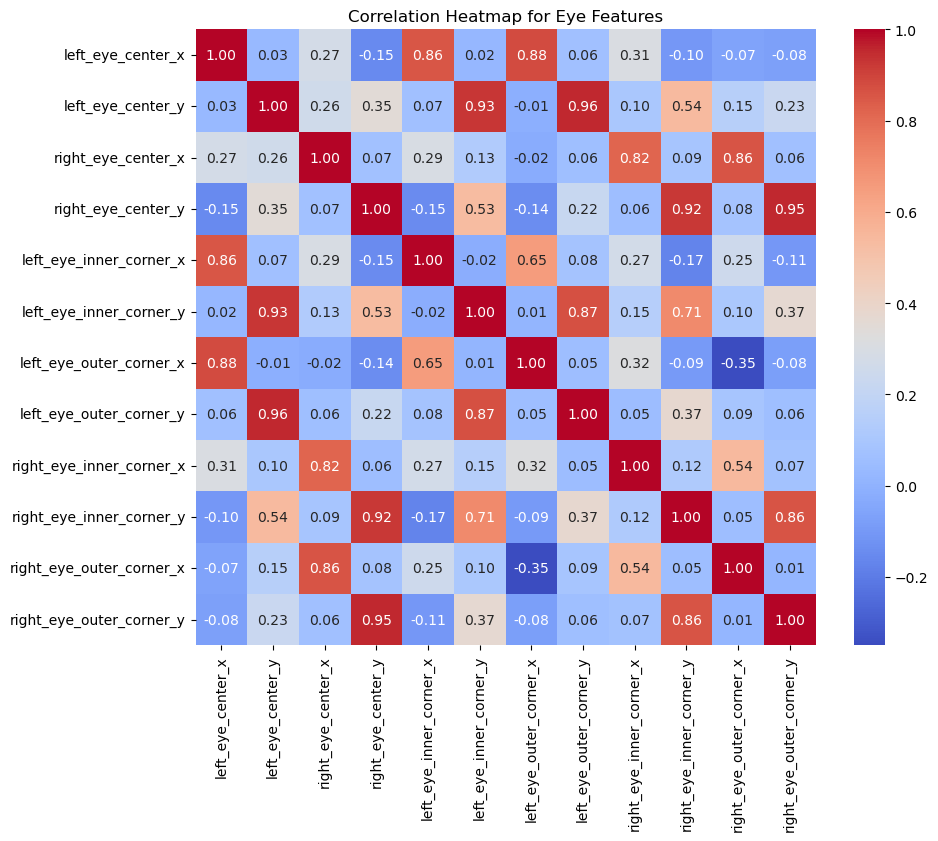

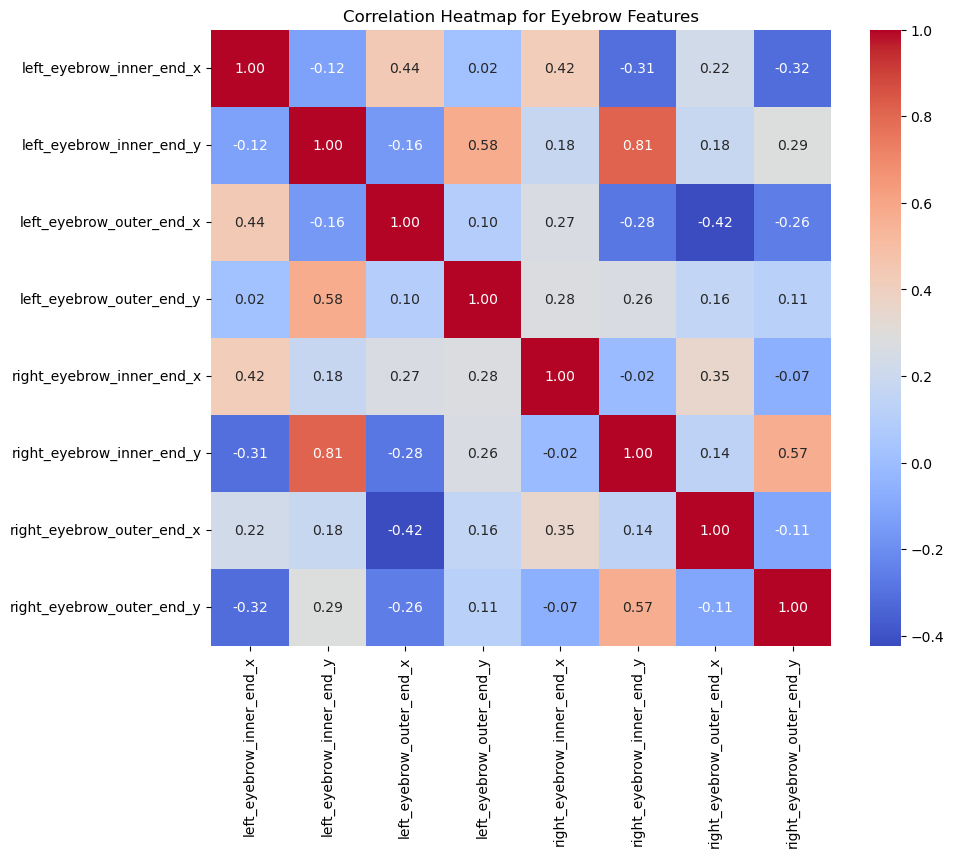

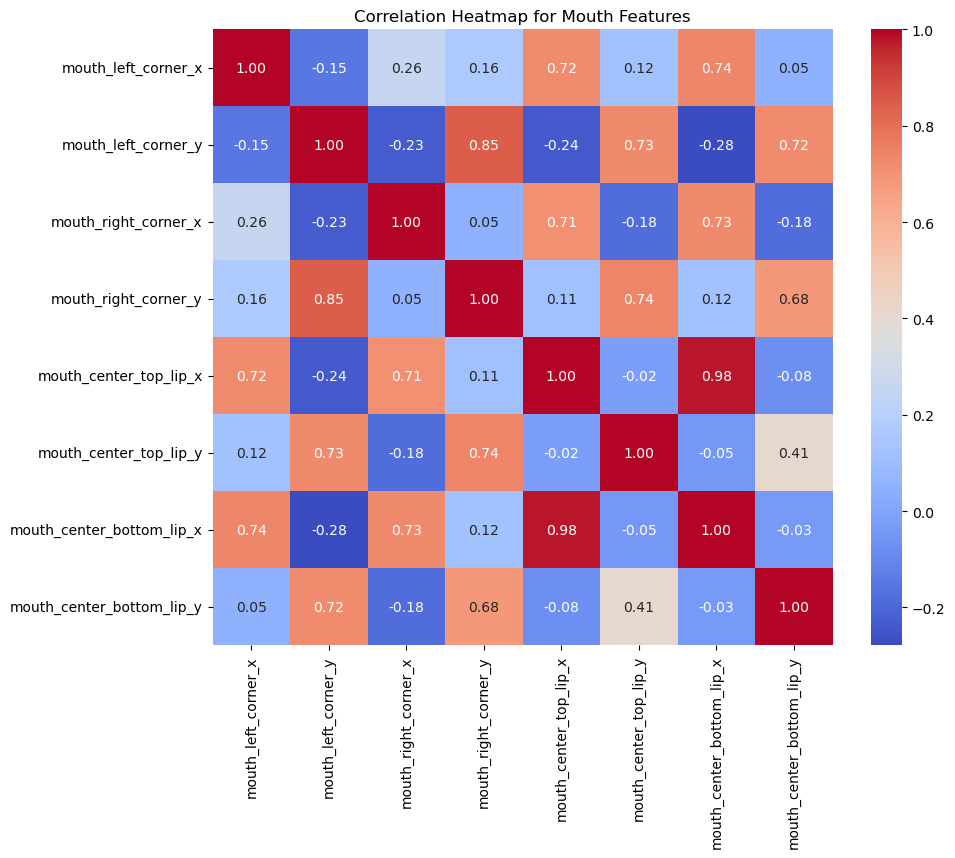

In [45]:
correlation_matrix = eye.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Eye Features')
plt.show()

correlation_matrix = eyebrow.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Eyebrow Features')
plt.show()

correlation_matrix = mouth.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Mouth Features')
plt.show()

## Scatter Plot
Scatter plots between the x and y positions of a feature are crucial for data analysis. They show the rough positions of where a feature should be located at. When applied to real training, the clusters (as shown below) could help a model better recognizes whether a given data point is outlier or not, thus improve the capability of a model to resist outliers and increase its overall performance.

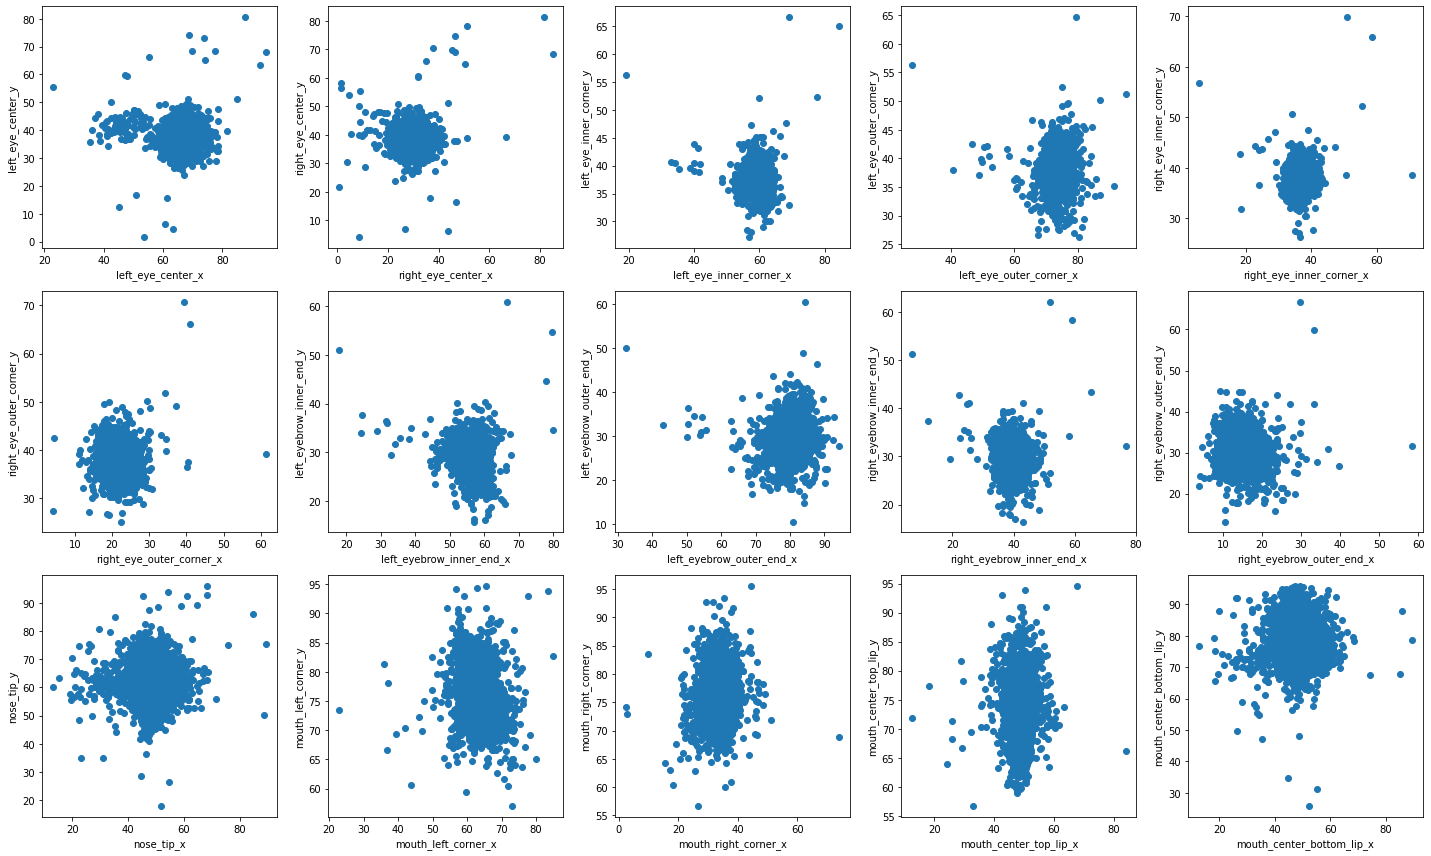

In [28]:
columns = dataset.columns.tolist()

num_plots = len(columns) // 2
num_rows = num_plots // 5
# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(20, num_rows * 4))

axs = axs.flatten()

for i in range(0, len(columns) - 1, 2):
    ax = axs[i // 2]
    x = dataset[columns[i]]
    y = dataset[columns[i+1]]

    ax.scatter(x, y)
    ax.set_xlabel(columns[i])
    ax.set_ylabel(columns[i+1])
for j in range(num_plots, num_rows * 5):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
